In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


# Clearly There is no missing Data 

# DATA PREPROCESSING
## Converting 'date' column to datetime format
### Extracting month and year for seasonal analysis

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
monthly_avg = df.groupby('month')['meantemp'].mean().reset_index()

In [7]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


#  Setting plot style And plotting graphs accordingly
# 1. Temperature trend over time

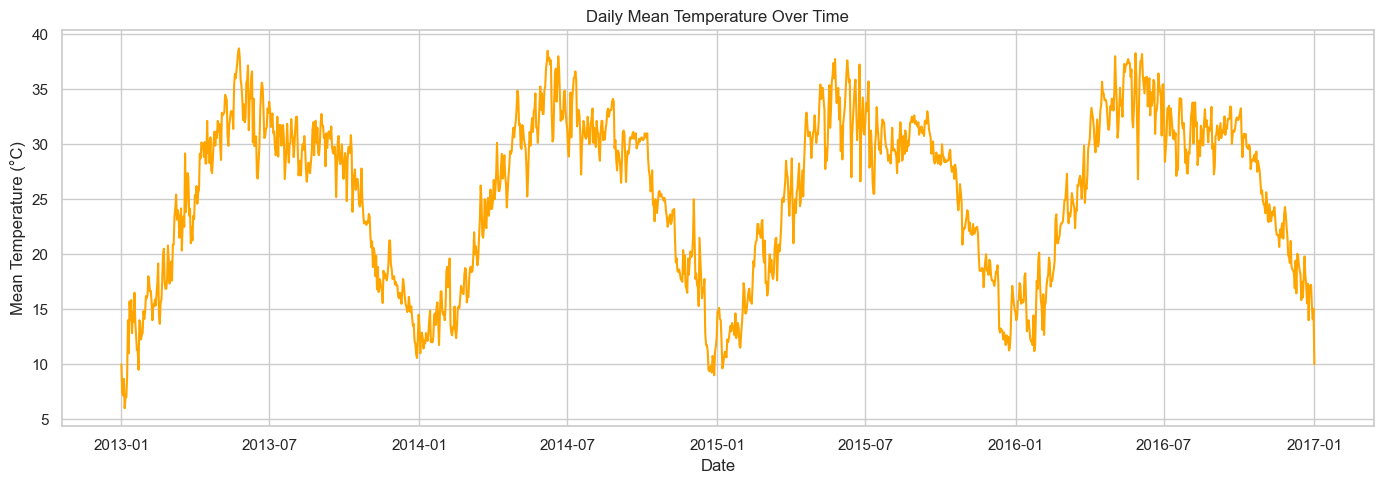

In [8]:

sns.set(style="whitegrid")


plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='date', y='meantemp', color='orange')
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.tight_layout()
plt.show()

# # 2. Monthly average temperature trend

C:\Users\anand\AppData\Local\Temp\ipykernel_2980\4084044595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='month', y='meantemp', palette='coolwarm')


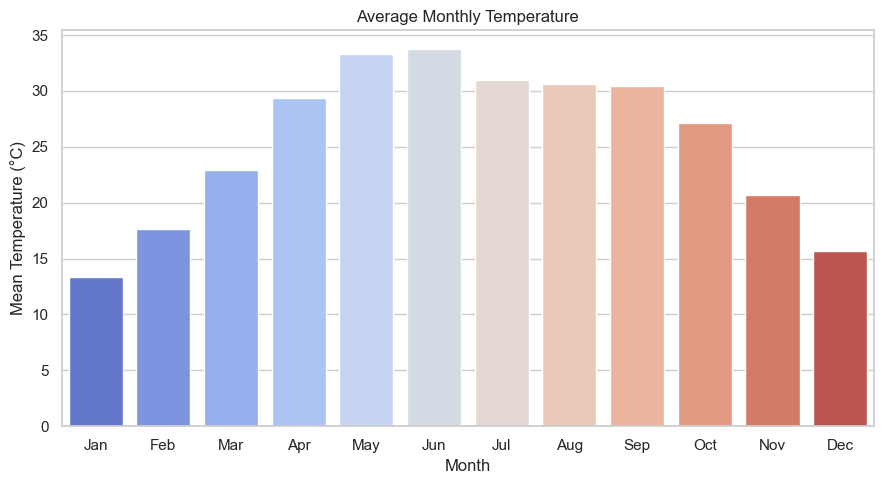

In [16]:



plt.figure(figsize=(9, 5))
sns.barplot(data=monthly_avg, x='month', y='meantemp', palette='coolwarm')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

# 

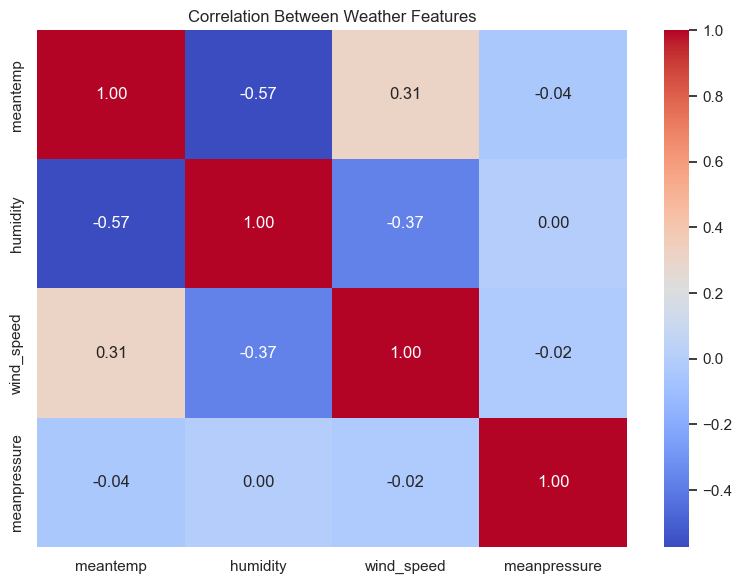

In [10]:

plt.figure(figsize=(8, 6))
corr_matrix = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Weather Features')
plt.tight_layout()
plt.show()